# Generator: Ball positions

In [1]:
import numpy as np
import matplotlib.pyplot as plt


def changeValue(duo):
    duo = np.array( duo )
    # new value different to zero. By default this has a uniform distribution
    newValue = np.random.choice( [-6 , -5 , -4 , -3 , -2 , -1 , 1 , 2 , 3 , 4 , 5 , 6] )
    while any(newValue == duo):
        newValue = np.random.choice( [-6 , -5 , -4 , -3 , -2 , -1 , 1 , 2 , 3 , 4 , 5 , 6] )
    return newValue

In [198]:
nLevels = 3
nBallsLevel = 60
nBalls = nBallsLevel * nLevels

# new value different to zero. 
# By default this has a uniform distribution
x = np.random.choice( [-6 , -5 , -4 , -3 , -2 , -1 , 1 , 2 , 3 , 4 , 5 , 6] , nBalls )

# checking consecutive equal values. 
# If true, it will take the previous and the next one value and create a new random value without repetition
for idx, val in enumerate(x):
    if idx == len(x)-1:
        break
    if x[idx+1] == val:
        x[idx] = changeValue( [x[idx+1],x[idx-1]] )

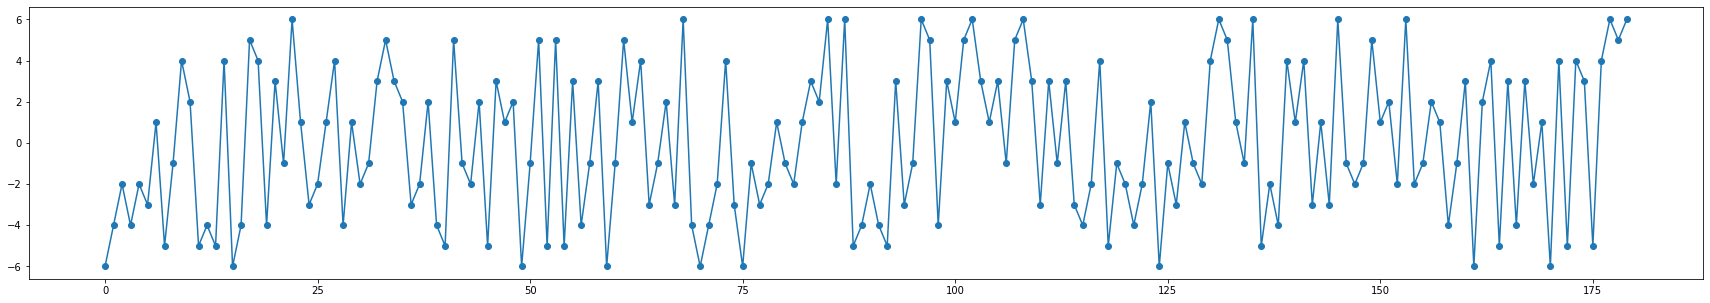

In [199]:
# verifing result visually
plt.figure(figsize=(30,5))
plt.plot(x, '-o')

In [200]:
# ball positions by level
level0 = x[0:nBallsLevel]
level1 = x[nBallsLevel:2*nBallsLevel]
level2 = x[2*nBallsLevel:]

In [201]:
# print in format for code in c#
level0

array([-6, -4, -2, -4, -2, -3,  1, -5, -1,  4,  2, -5, -4, -5,  4, -6, -4,
        5,  4, -4,  3, -1,  6,  1, -3, -2,  1,  4, -4,  1, -2, -1,  3,  5,
        3,  2, -3, -2,  2, -4, -5,  5, -1, -2,  2, -5,  3,  1,  2, -6, -1,
        5, -5,  5, -5,  3, -4, -1,  3, -6])

In [202]:
# print in format for code in c#
level1

array([-1,  5,  1,  4, -3, -1,  2, -3,  6, -4, -6, -4, -2,  4, -3, -6, -1,
       -3, -2,  1, -1, -2,  1,  3,  2,  6, -2,  6, -5, -4, -2, -4, -5,  3,
       -3, -1,  6,  5, -4,  3,  1,  5,  6,  3,  1,  3, -1,  5,  6,  3, -3,
        3, -1,  3, -3, -4, -2,  4, -5, -1])

In [203]:
# print in format for code in c#
level2

array([-2, -4, -2,  2, -6, -1, -3,  1, -1, -2,  4,  6,  5,  1, -1,  6, -5,
       -2, -4,  4,  1,  4, -3,  1, -3,  6, -1, -2, -1,  5,  1,  2, -2,  6,
       -2, -1,  2,  1, -4, -1,  3, -6,  2,  4, -5,  3, -4,  3, -2,  1, -6,
        4, -5,  4,  3, -5,  4,  6,  5,  6])

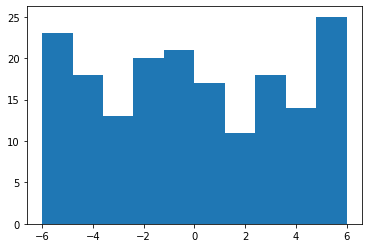

In [204]:
# plot histogram
plt.hist( x )
plt.show()

# Generator: Patterns

In [31]:
import numpy as np
import matplotlib.pyplot as plt


def createDoublePatterns(k, nCells):
    'function to create two patterns in sorted order'
    patternP = sorted( list( np.random.permutation( np.arange(0,nCells) )[:k] ))
    # create second pattern. It has to be different from the first one
    areSame = True
    while (areSame):
        patternQ = sorted( list( np.random.permutation( np.arange(0,nCells) )[:k] ))
        areSame = (patternP == patternQ)
    # return
    return patternP, patternQ


def printInFormatForUnity(pattern, nCells):
    msg = "new bool[" + str(nCells) + "] {"
    for k in range(0,nCells):
        if k in pattern:
            msg += " false, "
        else:
            msg += " true, "
    msg += "},"
    print(msg)


def plotPattern(pattern, side):
    p = np.zeros(side*side)

    for k in range( len(p) ):
        if k in pattern:
            p[k] = False
        else:
            p[k] = True

    p = p.reshape((side, side))    

    # print(p)
    plt.figure(figsize=(1,1))
    plt.imshow(p)
    plt.show()    
    

**For first idea for patterns**


After doing below step, make a manual inspection to change easy patterns:

In [53]:
patternsByLevel = 6
nCells = 16
# for each number, 2 patterns will be created, when number is 3, 4 patterns will be created
vector_numberblackCells = range(1,9) # for first idea for patterns
for k in vector_numberblackCells:
    patternP, patternQ = createDoublePatterns(k, nCells)
    print("\n"+str(k)+":")
    printInFormatForUnity( patternP, nCells )
    printInFormatForUnity( patternQ, nCells )
    if k==3:
        patternP, patternQ = createDoublePatterns(k, nCells)
        printInFormatForUnity( patternP, nCells )
        printInFormatForUnity( patternQ, nCells )


1:
new bool[16] { true,  true,  true,  true,  true,  true,  true,  false,  true,  true,  true,  true,  true,  true,  true,  true, },
new bool[16] { true,  true,  false,  true,  true,  true,  true,  true,  true,  true,  true,  true,  true,  true,  true,  true, },

2:
new bool[16] { true,  true,  true,  true,  true,  true,  true,  true,  true,  true,  true,  false,  true,  true,  false,  true, },
new bool[16] { true,  true,  false,  true,  true,  true,  true,  true,  true,  true,  true,  false,  true,  true,  true,  true, },

3:
new bool[16] { true,  true,  true,  true,  false,  true,  false,  false,  true,  true,  true,  true,  true,  true,  true,  true, },
new bool[16] { true,  true,  false,  false,  true,  true,  true,  true,  true,  true,  true,  true,  true,  true,  false,  true, },
new bool[16] { true,  true,  true,  false,  false,  true,  true,  false,  true,  true,  true,  true,  true,  true,  true,  true, },
new bool[16] { true,  true,  false,  true,  true,  true,  true,  true,

**For SECOND idea for patterns**


After doing below step, make a manual inspection to change easy patterns:


6:
new bool[25] { true,  true,  true,  true,  true,  true,  false,  true,  true,  true,  true,  true,  true,  false,  false,  true,  false,  true,  true,  false,  true,  false,  true,  true,  true, },
new bool[25] { true,  true,  true,  false,  true,  true,  true,  true,  true,  true,  false,  true,  true,  true,  false,  true,  true,  true,  true,  false,  true,  true,  true,  false,  false, },


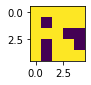

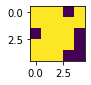


6:
new bool[25] { true,  true,  false,  true,  true,  true,  true,  false,  true,  true,  true,  true,  true,  false,  true,  true,  true,  false,  true,  false,  true,  true,  true,  true,  false, },
new bool[25] { true,  false,  true,  false,  true,  true,  true,  true,  true,  true,  true,  true,  true,  false,  false,  true,  true,  true,  true,  true,  false,  false,  true,  true,  true, },


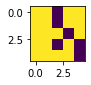

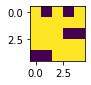


6:
new bool[25] { true,  true,  false,  false,  true,  true,  true,  true,  true,  true,  true,  true,  false,  true,  true,  true,  false,  true,  true,  false,  true,  true,  false,  true,  true, },
new bool[25] { false,  true,  false,  true,  true,  false,  false,  true,  true,  true,  true,  true,  true,  true,  true,  true,  true,  true,  true,  true,  true,  true,  true,  false,  false, },


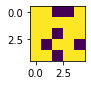

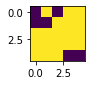


6:
new bool[25] { true,  true,  true,  false,  true,  true,  true,  false,  true,  true,  true,  true,  true,  false,  true,  true,  true,  true,  true,  true,  false,  true,  true,  false,  false, },
new bool[25] { true,  true,  false,  true,  true,  true,  false,  true,  true,  true,  true,  true,  false,  false,  true,  true,  true,  true,  true,  true,  true,  false,  true,  false,  true, },


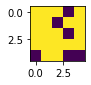

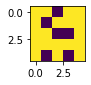


6:
new bool[25] { true,  false,  false,  true,  true,  true,  true,  true,  true,  true,  true,  true,  false,  true,  true,  true,  true,  false,  true,  true,  false,  true,  true,  true,  false, },
new bool[25] { true,  true,  false,  false,  false,  true,  true,  true,  false,  true,  true,  true,  true,  false,  false,  true,  true,  true,  true,  true,  true,  true,  true,  true,  true, },


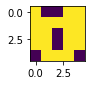

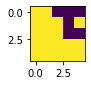


6:
new bool[25] { false,  false,  true,  true,  true,  true,  true,  false,  true,  true,  true,  true,  true,  true,  true,  false,  true,  true,  false,  true,  true,  true,  true,  false,  true, },
new bool[25] { true,  true,  true,  true,  true,  true,  false,  true,  true,  false,  true,  false,  true,  true,  true,  true,  false,  false,  false,  true,  true,  true,  true,  true,  true, },


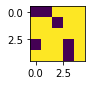

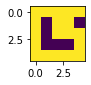

In [15]:
nCells = 25
# for each number, 2 patterns will be created
# vector_numberblackCells = [3, 3, 3, 5, 5, 5]
vector_numberblackCells = [6, 6, 6, 6, 6, 6]
n = 0
for k in vector_numberblackCells:
    patternP, patternQ = createDoublePatterns(k, nCells)
    print("\n"+str(k)+":")
    printInFormatForUnity( patternP, nCells)
    printInFormatForUnity( patternQ, nCells)
    plotPattern(patternP, int(np.sqrt(nCells)) )
    plotPattern(patternQ, int(np.sqrt(nCells)) )


6:
new bool[25] { true,  true,  true,  true,  true,  false,  true,  true,  true,  false,  false,  true,  true,  true,  true,  true,  false,  true,  true,  false,  true,  true,  false,  true,  true, },
new bool[25] { true,  true,  true,  true,  true,  true,  true,  true,  true,  true,  true,  true,  true,  true,  false,  false,  true,  false,  true,  false,  false,  true,  false,  true,  true, },


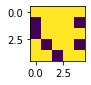

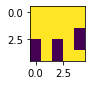


6:
new bool[25] { true,  true,  true,  true,  true,  true,  false,  true,  true,  true,  true,  true,  false,  true,  true,  false,  true,  true,  true,  false,  true,  true,  false,  false,  true, },
new bool[25] { true,  true,  true,  true,  true,  true,  false,  true,  false,  true,  true,  true,  true,  true,  false,  true,  true,  true,  false,  true,  false,  false,  true,  true,  true, },


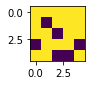

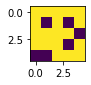


6:
new bool[25] { false,  false,  true,  true,  true,  true,  true,  true,  true,  true,  true,  true,  true,  false,  true,  true,  false,  true,  true,  false,  true,  false,  true,  true,  true, },
new bool[25] { true,  false,  true,  true,  false,  false,  true,  true,  true,  false,  true,  true,  true,  true,  true,  true,  false,  true,  true,  true,  true,  true,  true,  false,  true, },


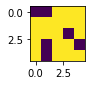

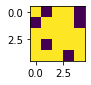

In [35]:
nCells = 25
# for each number, 2 patterns will be created
vector_numberblackCells = [6, 6, 6]
n = 0
for k in vector_numberblackCells:
    patternP, patternQ = createDoublePatterns(k, nCells)
    print("\n"+str(k)+":")
    printInFormatForUnity( patternP, nCells)
    printInFormatForUnity( patternQ, nCells)
    plotPattern(patternP, int(np.sqrt(nCells)) )
    plotPattern(patternQ, int(np.sqrt(nCells)) )